# Entropy 基本概念
* 用來衡量一個事件所包含的資訊量
* [參考資料](https://machinelearningmastery.com/what-is-information-entropy/)
## 計算一個事件的 Entropy
* 舉例來說好，如果你明天要吃早餐為事件 A 跟你明天會中大獎 為事件 B ，A事件和B事件來說哪一個是重大事件，直觀來看顯而易見。當然是 B 件中大獎的 entropy 比較大嚕
* 再來如果是使用 log2 為底的可以看做是用二進位編碼所需要的 bit 數
* Entropy公式如下： $$h(x)=-log(p(x))$$
* Large entropy value is related more surprise 




In [7]:
from math import log2
from matplotlib import pyplot
def h(x):
    return -1*log2(x)
print("吃早餐的 entropy :{}".format(h(.9)))
print("中獎的   entropy :{}".format(h(.01)))

吃早餐的 entropy :0.15200309344504995
中獎的   entropy :6.643856189774724


In [14]:
prob = [1/(x+1) for x in range(10)] 

In [17]:
h_dis = [h(p) for p in prob]

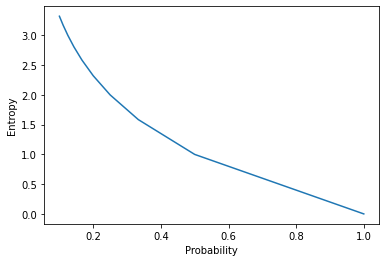

In [20]:
pyplot.xlabel("Probability")
pyplot.ylabel("Entropy")
pyplot.plot(prob,h_dis)


## 計算一組事件的 Entropy
* 原文說明　Entropy can be calculated for a random variable X with k in K discrete states as follows
* 舉例來說明天的天氣狀況可分為 晴天、雨天、陰天 ，如果來評估一個天氣各種變化事件的 entropy 其公式如下，白話的說就是將每一個事件所代表的 entropy 再乘上機率，並且加總起來就是這組件的 entropy 。
* $$\sum_{k} -1*p(k)*log(p(k))$$
* 直觀的說明: 以天氣預測為例，如果明天的狀況是　"下雨" "晴天" "陰天" 機率各佔 1/3 ，其實這樣是非常難預測的。因為非常模稜兩可,故這樣狀態下的 entropy 是比較大的


In [22]:
case1_p = [0.3333,0.3333,0.3333]
case2_p = [.8,.1,.1]

In [27]:
def sum_entropy(case):
    r = 0 
    for p in case:
        r = r + -1*p*log2(p)
    return r

In [31]:
print("""
"下雨" "晴天" "陰天" 機率各佔 1/3
""")
sum_entropy(case1_p)


"下雨" "晴天" "陰天" 機率各佔 1/3



1.5849482667614572

In [32]:
print("""
很明顯是下雨天的情況下
""")
sum_entropy(case2_p)


很明顯是下雨天的情況下



0.9219280948873623

# 延伸思考
* kent 中大獎的 entropy 是高的
* 用來預測 kent 是否會中彩券頭獎，這樣的 entropy 總和是比預測吃早餐來的低。白話的來說預測我會不會中獎，是比較簡單的因為 entropy 比較低

# Cross Entropy
* Cross-Entropy is a measure of the difference between two probability distributions for a givne raddom variable or set of events. 
* You might recall that information quantifies the number of bits required to encode and transmit an event. Lower probability events have more information, higher probability events have less information.
* [參考資料](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
* 主要用在資訊資料領域上，用來評估一個模擬系統或者是預測系統與真實資料分佈的差異有多遠。 更正確的說是一種 scoring function 並不是距離。
* q is a simulation function or a classification model's output distribution. p is a groud truth distribution. the cross entropy is a scoring function to measure this difference between q and p. 
* entropy formula is below $$\sum_{x}-1*p(x)*log(q(x))$$


P=1.000 Q=1.000


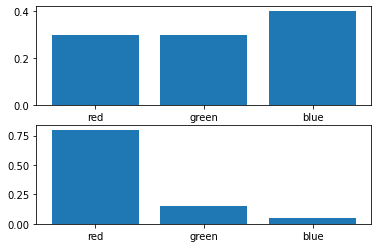

In [49]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.30, 0.30, 0.40]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

In [50]:
def cross_entropy(p,q):
    r = sum([  -1*p[i]*log2(q[i])   for i in range(len(q))])
    return r
    

In [51]:
print("h(p,q):{}".format(cross_entropy(p,q)))
print("h(q,p):{}".format(cross_entropy(q,p)))

h(p,q):2.6464393446710157
h(q,p):1.7162137192022644


# KL Divergence


In [33]:
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

P=1.000 Q=1.000


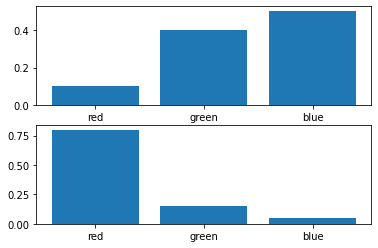

In [34]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

In [35]:
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))


In [36]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


In [40]:
.1*log2(.1/.8) + .4*log2(.4/.15) + .5*log2(.5/.05)

1.9269790471552186

In [42]:
.5*log2(.9/.05)

2.084962500721156